## Importing Library

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
from collections import Counter
import pywt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis,entropy
from sklearn.preprocessing import MinMaxScaler
from scipy.fftpack import fft, fftfreq
from sklearn.metrics import classification_report,confusion_matrix
from scipy.fft import fft, fftfreq
import statistics as st
import scipy.stats as scst
import pandas as pd
import numpy as np

## Importing Csv Files

## For ECG Signal_3

In [106]:
data_3=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG _3.csv")
data_3=data_3.fillna(0)
data_3


,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
125265,0,901
125266,0,896
125267,0,897
125268,0,891


## For ECG Signal_4

In [109]:
data_4=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG _4.csv")
data_4=data_4.fillna(0)
data_4

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
150255,0,623
150256,0,627
150257,0,629
150258,0,628


## For ECG Signal_5

In [112]:
data_5=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG _5.csv")
data_5=data_5.fillna(0)
data_5

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
164081,0,1145
164082,0,909
164083,0,556
164084,0,1061


## For ECG Signal_6

In [115]:
data_6=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG_6.csv")
data_6=data_6.fillna(0)
data_6

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
178627,0,989
178628,0,1009
178629,0,1021
178630,0,1025


## For ECG Signal_7

In [117]:
data_7=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG _7.csv")
data_7=data_7.fillna(0)
data_7

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
193085,0,1237
193086,0,1384
193087,0,1118
193088,0,1153


## For ECG Signal_8

In [120]:
data_8=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG _8.csv")
data_8=data_8.fillna(0)
data_8

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
206413,0,1009
206414,0,892
206415,0,1048
206416,0,1123


## For ECG Signal_9

In [123]:
data_9=pd.read_csv("D:\\RKMGEC COLLEGE\\internship iiest shibpur\\ECG _9.csv")
data_9=data_9.fillna(0)
data_9

,time,mV
0,2025 06 26 11:42:14.431748,339
1,0,611
2,0,919
3,0,575
4,0,563
...,...,...
223171,0,962
223172,0,948
223173,0,944
223174,0,946


## Plotting Of ECG Signals

In [126]:
ecg_3=data_3.iloc[0:125270,1:2] .values.ravel()
ecg_3



array([339, 611, 919, ..., 897, 891, 894], dtype=int64)

In [127]:
ecg_3.shape

(125270,)

In [128]:
ecg_4=data_4.iloc[0:150260,1:2] .values.ravel()
ecg_4


array([339, 611, 919, ..., 629, 628, 629], dtype=int64)

In [130]:
ecg_4.shape

(150260,)

In [131]:
ecg_5=data_5.iloc[0:164086,1:2] .values.ravel()
ecg_5
ecg_5.shape

(164086,)

In [135]:
ecg_6=data_6.iloc[0:178632,1:2] .values.ravel()
ecg_6
ecg_6.shape

(178632,)

In [138]:
ecg_7=data_7.iloc[0:193090,1:2] .values.ravel()
ecg_7
ecg_7.shape

(193090,)

In [139]:
ecg_8=data_8.iloc[0:206418,1:2] .values.ravel()
ecg_8
ecg_8.shape

(206418,)

In [140]:
ecg_9=data_9.iloc[0:223176,1:2] .values.ravel()
ecg_9
ecg_9.shape

(223176,)

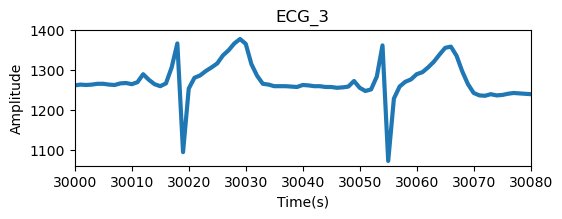

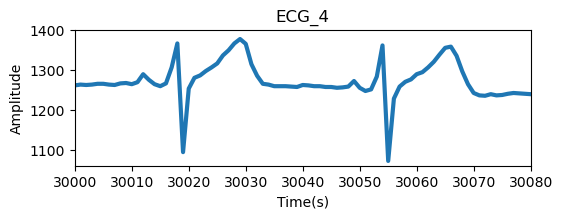

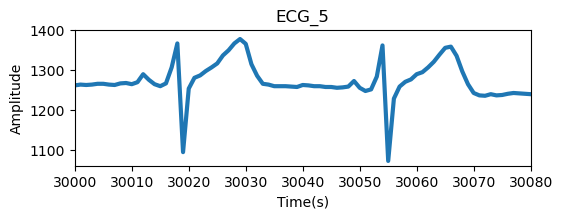

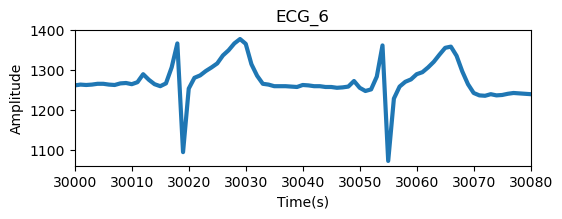

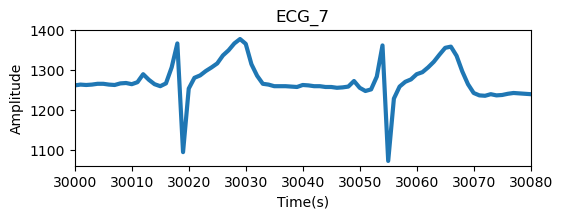

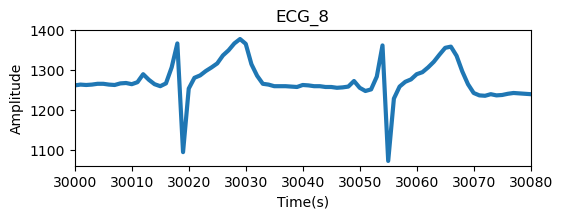

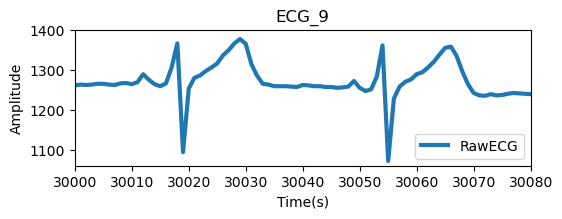

In [142]:
plt.figure(figsize=(20,6))
plt.subplot(3,3,1)
plt.plot(ecg_3,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_3')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.figure(figsize=(20,6))
plt.subplot(3,3,2)
plt.plot(ecg_4,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_4')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.figure(figsize=(20,6))
plt.subplot(3,3,3)
plt.plot(ecg_5,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_5')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.figure(figsize=(20,6))
plt.subplot(3,3,4)
plt.plot(ecg_6,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_6')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.figure(figsize=(20,6))
plt.subplot(3,3,5)
plt.plot(ecg_7,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_7')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.figure(figsize=(20,6))
plt.subplot(3,3,6)
plt.plot(ecg_8,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_8')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.figure(figsize=(20,6))
plt.subplot(3,3,7)
plt.plot(ecg_9,linewidth=3,label='RawECG')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('ECG_9')
plt.xlim([30000,30080])
plt.ylim([1060,1400])

plt.legend()
plt.show()

## Stastical Analysis Min,Max, Mean, Median , Sum,Standard Deviation :

In [147]:
ecg_3_list = ecg_3.astype(float).tolist()
ecg_4_list = ecg_4.astype(float).tolist()
ecg_5_list = ecg_5.astype(float).tolist()
ecg_6_list = ecg_6.astype(float).tolist()
ecg_7_list = ecg_7.astype(float).tolist()
ecg_8_list = ecg_8.astype(float).tolist()
ecg_9_list = ecg_9.astype(float).tolist()



In [148]:
print("[Minimum, Maximun, Mean, Median, Sum, Standard Deviation]\n\n")
print("For Signal ECG_3:")
min_3=np.min(ecg_3)
max_3=np.max(ecg_3)
Mean_3=np.mean(ecg_3)
Median_3=np.median(ecg_3)
Sum_3=np.sum(ecg_3)
STD_3=st.stdev(ecg_3_list)
print([min_3, max_3, Mean_3, Median_3, Sum_3, STD_3])
print("\n")

print("For Signal ECG_4:")
min_4=np.min(ecg_4)
max_4=np.max(ecg_4)
Mean_4=np.mean(ecg_4)
Median_4=np.median(ecg_4)
Sum_4=np.sum(ecg_4)
STD_4=st.stdev(ecg_4_list)
print([min_4, max_4, Mean_4, Median_4, Sum_4, STD_4])
print("\n")

print("For Signal ECG_5:")
min_5=np.min(ecg_5)
max_5=np.max(ecg_5)
Mean_5=np.mean(ecg_5)
Median_5=np.median(ecg_5)
Sum_5=np.sum(ecg_5)
STD_5=st.stdev(ecg_5_list)
print([min_5, max_5, Mean_5, Median_5, Sum_5, STD_5])
print("\n")

print("For Signal ECG_6:")
min_6=np.min(ecg_6)
max_6=np.max(ecg_6)
Mean_6=np.mean(ecg_6)
Median_6=np.median(ecg_6)
Sum_6=np.sum(ecg_6)
STD_6=st.stdev(ecg_6_list)
print([min_6, max_6, Mean_6, Median_6, Sum_6, STD_6])
print("\n")

print("For Signal ECG_7:")
min_7=np.min(ecg_7)
max_7=np.max(ecg_7)
Mean_7=np.mean(ecg_7)
Median_7=np.median(ecg_7)
Sum_7=np.sum(ecg_7)
STD_7=st.stdev(ecg_7_list)
print([min_7, max_7, Mean_7, Median_7, Sum_7, STD_7])
print("\n")

print("For Signal ECG_8:")
min_8=np.min(ecg_8)
max_8=np.max(ecg_8)
Mean_8=np.mean(ecg_8)
Median_8=np.median(ecg_8)
Sum_8=np.sum(ecg_8)
STD_8=st.stdev(ecg_8_list)
print([min_8, max_8, Mean_8, Median_8, Sum_8, STD_8])
print("\n")

print("For Signal ECG_9:")
min_9=np.min(ecg_9)
max_9=np.max(ecg_9)
Mean_9=np.mean(ecg_9)
Median_9=np.median(ecg_9)
Sum_9=np.sum(ecg_9)
STD_9=st.stdev(ecg_9_list)
print([min_9, max_9, Mean_9, Median_9, Sum_9, STD_9])
print("\n")

[Minimum, Maximun, Mean, Median, Sum, Standard Deviation]


For Signal ECG_3:
[0, 49922, 906.7760277799952, 943.0, 113591833, 1009.4295822931235]


For Signal ECG_4:
[0, 49922, 864.5537734593371, 880.0, 129907850, 926.873334468703]


For Signal ECG_5:
[0, 49922, 875.4911631705326, 897.0, 143655843, 891.1243181519873]


For Signal ECG_6:
[0, 49922, 869.8626449908191, 907.0, 155385304, 859.0179782072886]


For Signal ECG_7:
[0, 49922, 889.9455228131959, 917.0, 171839581, 973.3353846634726]


For Signal ECG_8:
[0, 49922, 895.7650544041702, 933.0, 184902031, 941.8098817228146]


For Signal ECG_9:
[0, 49922, 895.0560902606015, 927.0, 199755038, 906.3844579712833]




## Average Of Min,Max, Mean, Median , Sum,Standard Deviation :

In [150]:
Avg_min= np.mean([min_3,min_4,min_5,min_6,min_7,min_8,min_9])
Avg_max= np.mean([max_3,max_4,max_5,max_6,max_7,max_8,max_9])
Avg_mean= np.mean([Mean_3,Mean_4,Mean_5,Mean_6,Mean_7,Mean_8,Mean_9])
Avg_median= np.mean([Median_3,Median_4,Median_5,Median_6,Median_7,Median_8,Median_9])
Avg_sum= np.mean([Sum_3,Sum_4,Sum_5,Sum_6,Sum_7,Sum_8,Sum_9])
Avg_STD= np.mean([STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9])
print("The Average Of : [Minimum, Maximun, Mean, Median, Sum, Standard Deviation]\n")
print([Avg_min, Avg_max, Avg_mean, Avg_median, Avg_sum, Avg_STD])




The Average Of : [Minimum, Maximun, Mean, Median, Sum, Standard Deviation]

[0.0, 49922.0, 885.350039554093, 914.8571428571429, 157005354.2857143, 929.710705354096]


## Outlier Removing Using Z-score Method

## Removing Outliers From ECG Signal_3 

In [153]:
data_3['zscore']=(data_3.mV-Avg_mean)/Avg_STD
data_3.head(125270)

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
125265,0,901,0.016833
125266,0,896,0.011455
125267,0,897,0.012531
125268,0,891,0.006077


In [154]:
data_no_outlier_3=data_3[(data_3.zscore>-3) & (data_3.zscore<3)]
data_no_outlier_3


,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
125265,0,901,0.016833
125266,0,896,0.011455
125267,0,897,0.012531
125268,0,891,0.006077


## Removing Outliers From ECG Signal_4

In [156]:
data_4['zscore']=(data_4.mV-Avg_mean)/Avg_STD
data_no_outlier_4=data_4[(data_4.zscore>-3) & (data_4.zscore<3)]
data_no_outlier_4


,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
150255,0,623,-0.282185
150256,0,627,-0.277882
150257,0,629,-0.275731
150258,0,628,-0.276807


## Removing Outliers From ECG Signal_5

In [158]:
data_5['zscore']=(data_5.mV-Avg_mean)/Avg_STD
data_no_outlier_5=data_5[(data_5.zscore>-3) & (data_5.zscore<3)]
data_no_outlier_5

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
164081,0,1145,0.279280
164082,0,909,0.025438
164083,0,556,-0.354250
164084,0,1061,0.188930


## Removing Outliers From ECG Signal_6

In [160]:
data_6['zscore']=(data_6.mV-Avg_mean)/Avg_STD
data_no_outlier_6=data_6[(data_6.zscore>-3) & (data_6.zscore<3)]
data_no_outlier_6

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
178627,0,989,0.111486
178628,0,1009,0.132998
178629,0,1021,0.145906
178630,0,1025,0.150208


## Removing Outliers From ECG Signal_7

In [162]:
data_7['zscore']=(data_7.mV-Avg_mean)/Avg_STD
data_no_outlier_7=data_7[(data_7.zscore>-3) & (data_7.zscore<3)]
data_no_outlier_7

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
193085,0,1237,0.378236
193086,0,1384,0.536350
193087,0,1118,0.250239
193088,0,1153,0.287885


## Removing Outliers From ECG Signal_8

In [164]:
data_8['zscore']=(data_8.mV-Avg_mean)/Avg_STD
data_no_outlier_8=data_8[(data_8.zscore>-3) & (data_8.zscore<3)]
data_no_outlier_8

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
206413,0,1009,0.132998
206414,0,892,0.007153
206415,0,1048,0.174947
206416,0,1123,0.255617


## Removing Outliers From ECG Signal_9

In [166]:
data_9['zscore']=(data_9.mV-Avg_mean)/Avg_STD
data_no_outlier_9=data_9[(data_9.zscore>-3) & (data_9.zscore<3)]
data_no_outlier_9

,time,mV,zscore
0,2025 06 26 11:42:14.431748,339,-0.587656
1,0,611,-0.295092
2,0,919,0.036194
3,0,575,-0.333814
4,0,563,-0.346721
...,...,...,...
223171,0,962,0.082445
223172,0,948,0.067387
223173,0,944,0.063084
223174,0,946,0.065235


## Autocorrelation Plots

## For ECG Signal_3

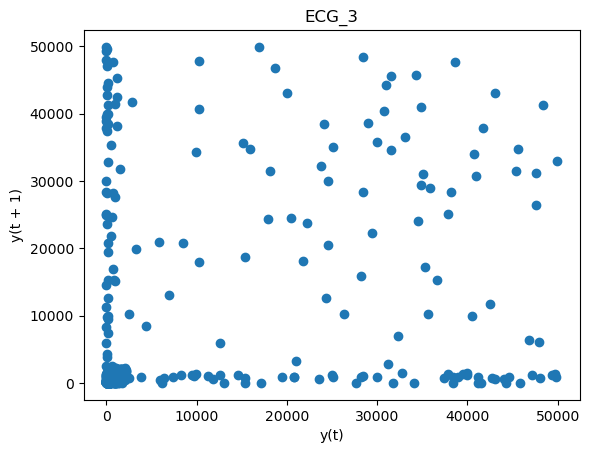

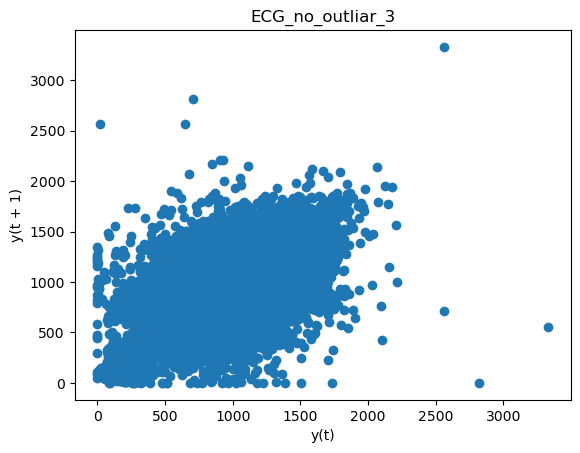

In [170]:
from pandas.plotting import lag_plot
series =data_3.mV
lag_plot(series)
#plt.xlim([-10000,60000])
#plt.ylim([-10000,60000])
plt.title('ECG_3')
plt.show()

series =data_no_outlier_3.mV
lag_plot(series)
#plt.xlim([-100,4000])
#plt.ylim([-100,4000])
plt.title('ECG_no_outliar_3')
plt.show()

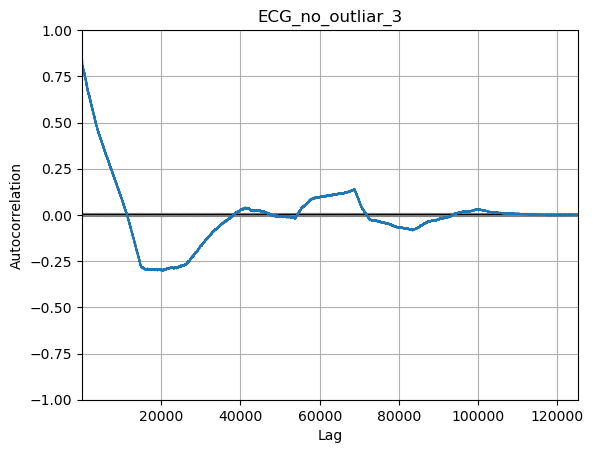

In [171]:
from pandas.plotting import autocorrelation_plot
series=data_no_outlier_3.mV
autocorrelation_plot(series)
plt.title('ECG_no_outliar_3')
#plt.xlim([0,2000])
#plt.ylim([-0.05,0.15])
plt.show()

## Persistence Model Of Autoregression To Identify Mean Square Error(MSE)

## For ECG Signal_3: Expected is Blue & Predicted is Red

Test MSE: 20.714


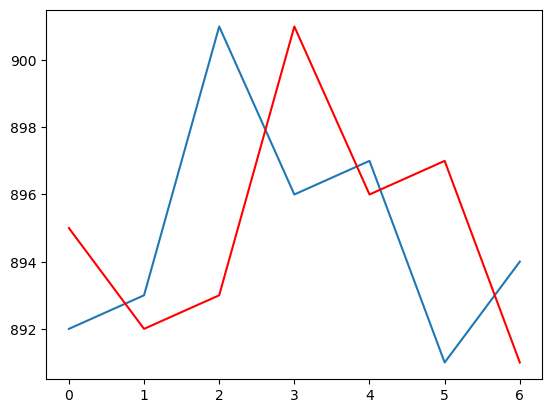

In [175]:
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
series=data_no_outlier_3.mV
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

## After Summarized The MSE

Coefficients: [8.72971520e+00 1.25546347e-01 1.34112424e-01 1.00978841e-01
 6.72435559e-02 6.09844689e-02 5.79137055e-02 3.70499236e-02
 2.91331679e-02 3.08223882e-02 2.65112485e-02 3.59421120e-02
 3.09719340e-02 3.18041625e-02 2.04632888e-02 1.62910499e-02
 1.39342706e-02 1.29197307e-02 1.32518700e-02 1.48419263e-02
 9.31030239e-03 1.75106246e-02 1.63232765e-02 1.38508059e-02
 9.89408988e-03 3.47377561e-03 1.38997429e-02 1.32729505e-02
 1.92753468e-02 1.25789269e-02]
predicted=927.585392, expected=892.000000
predicted=928.558242, expected=893.000000
predicted=930.585561, expected=901.000000
predicted=933.680704, expected=896.000000
predicted=933.800442, expected=897.000000
predicted=934.569891, expected=891.000000
predicted=933.651374, expected=894.000000
Test RMSE: 37.130


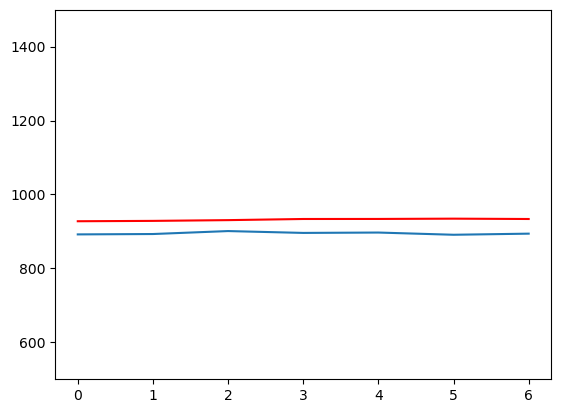

In [177]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series=data_no_outlier_3.mV
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
#plt.xlim([100,20000])
plt.ylim([500,1500])
plt.show()

## FFT After Removing DC Offset

In [194]:
#Removing DC Offset From Signal data_no_outlier_3 
data_no_outlier_3=data_no_outlier_3-np.mean(data_no_outlier_3)


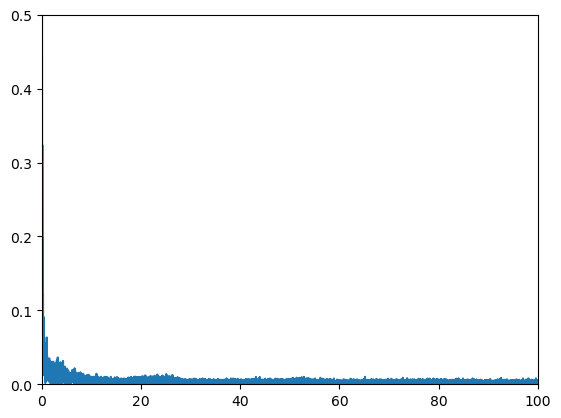

In [215]:
#FFT
from scipy.fftpack import fft,fftfreq
#data_no_outlier_3=data.iloc[5:6,1:2501].values.ravel()
fs=1000 #sampling frequency
t=np.arange(len(data_no_outlier_3.values))/fs
N=len(data_no_outlier_3.values)
fft_clean=fft(data_no_outlier_3.values)
freqs=fftfreq(N,1/fs)

#focus on positive frequencies
pos_freqs_clean=freqs[:N//2]
magnitude_clean=np.abs(fft_clean[:N//2])
magnitude_clean_norm=(magnitude_clean-np.min(magnitude_clean))/(np.max(magnitude_clean)-np.min(magnitude_clean))
plt.plot(pos_freqs_clean,magnitude_clean_norm)
plt.xlim([0,100])
plt.ylim([0,.5])         
plt.show()